In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 
import seaborn as sns

In [2]:
## Datasets
data_domains=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\machine-learning-for-yeast\datasets-for-learning\proteins-domains-from-Pfam.xlsx',header=0,index_col='Unnamed: 0')
data_domains=data_domains.dropna()
data_sl=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\machine-learning-for-yeast\datasets-for-learning\data-synthetic-lethals.xlsx',header=0)
data_nonsl=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\machine-learning-for-yeast\datasets-for-learning\data-phenotypic-enhancement.xlsx',header=0)



## Building the feature matrix
 One matrix for true SL where each column is one pair of SL. Every column will be a vector of  0,1 or 2 depending on the comparison with the domain list. for colum i the jth element = 0 if the jth element of the domain list is not in neither protein A and B, 1, if it is in one of them and 2 if it is in both of them .  




In [3]:
########################## Building the feature matrix#################################
domain_id_list=data_domains['domain-id']
query_gene=data_sl['gene-query-name']
target_gene=data_sl['gene-target-name']
query_gene_nonlethal=data_nonsl['gene-query-name']
target_gene_nonlethal=data_nonsl['gene-target-name']


protein_a_list=[]
protein_b_list=[]
protein_a_list_non=[]
protein_b_list_non=[]

for m in np.arange(0,500):
    protein_a=data_domains[data_domains['name']==query_gene[m]]
    protein_b=data_domains[data_domains['name']==target_gene[m]]
    protein_a_list.append(protein_a['domain-id'].tolist())
    protein_b_list.append(protein_b['domain-id'].tolist())

    protein_a_non=data_domains[data_domains['name']==query_gene_nonlethal[m]]
    protein_b_non=data_domains[data_domains['name']==target_gene_nonlethal[m]]
    protein_a_list_non.append(protein_a_non['domain-id'].tolist())
    protein_b_list_non.append(protein_b_non['domain-id'].tolist())
    

In [4]:
x=[1,2,3,7,5,6,7,8]
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
get_indexes(7,x) 



[3, 6]

In [4]:
########################## Building the feature matrix for lethals pairs#################################
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

x = np.unique(domain_id_list)
protein_feat_true=np.zeros(shape=(len(x),len(protein_a_list)))
index_a=[]
for i in np.arange(0,len(protein_a_list)):
    pair=[protein_a_list[i],protein_b_list[i]]
    pair_a_b=np.concatenate(pair).ravel()
    for j in pair_a_b:
        index_a.append(get_indexes(j,x))

    array,index,counts=np.unique(index_a,return_index=True,return_counts=True)
    for k,m in zip(counts,index):
        if k >=2:
            protein_feat_true[index_a[m],i]=2
            
        if k==1:
            protein_feat_true[index_a[m],i]=1
            # print(index_a[m],i)



    



In [10]:
protein_feat_true_pd=pd.DataFrame(protein_feat_true.T)
np.mean(protein_feat_true_pd.iloc[0,:])

# stats_lethals=protein_feat_true_pd.describe()
# stats_lethals.index

0.0005534800055348

## Build a feature matrix using the rows per protein pair:

- Feature 1: Mean of the each row per protein par (a long vector of 0, 1 and 2)
- feature 2: Number of 0 
- feature 3: Number of 1
- feature 4: Number of 2

In [98]:
feature_post_true=defaultdict(dict)

for ind in protein_feat_true_pd.index:
    feature_post_true[ind]['Mean']=np.mean(protein_feat_true_pd.iloc[ind,:])
    feature_post_true[ind]['std']=np.std(protein_feat_true_pd.iloc[ind,:])
    array,index,counts=np.unique(protein_feat_true_pd.iloc[ind,:],return_index=True,return_counts=True)
    for i in array:
        if i == 0:
            feature_post_true[ind]['Nr of zeros']=counts[0]
        if i==1:
            feature_post_true[ind]['Nr of ones']=counts[1]
        if i==2:
            feature_post_true[ind]['Nr of twos']=counts[2]
    

In [99]:
feature_post_true_pd=pd.DataFrame(feature_post_true)



In [100]:
feature_post_true_pd=feature_post_true_pd.T

feature_post_true_pd=feature_post_true_pd.fillna(0)

In [34]:
# sns_plot=sns.heatmap(protein_feat_true_pd,vmin=0,vmax=2,cmap="inferno",center=1)

# sns_plot.set(xlabel='protein-domains-indexes',ylabel='SL-protein-pairs')
# fig = sns_plot.get_figure()
# fig.tight_layout()

#fig.savefig('heatmap-data-true-0-3000-proteins-domains.png',dpi=300,format='png',transparent=True) 

In [101]:
feature_post_true_pd['lethality']=np.ones(shape=(500))

In [36]:
########################## Building the feature matrix for non-lethals pairs#################################

x = np.unique(domain_id_list)
protein_feat_nonlethal=np.zeros(shape=(len(x),len(protein_a_list_non)))
index_a=[]
for i in np.arange(0,len(protein_a_list_non)):
    pair=[protein_a_list_non[i],protein_b_list_non[i]]
    pair_a_b=np.concatenate(pair).ravel()
    for j in pair_a_b:
        index_a.append(get_indexes(j,x))
        
    array,index,counts=np.unique(index_a,return_index=True,return_counts=True)
    for k,m in zip(counts,index):
        if k >=2:
            protein_feat_nonlethal[index_a[m],i]=2
        if k==1:
            protein_feat_nonlethal[index_a[m],i]=1



In [39]:
protein_feat_nonlethal_pd=pd.DataFrame(protein_feat_nonlethal.T)


In [102]:
feature_post_false=defaultdict(dict)

for ind in protein_feat_nonlethal_pd.index:
    feature_post_false[ind]['Mean']=np.mean(protein_feat_nonlethal_pd.iloc[ind,:])
    feature_post_false[ind]['std']=np.std(protein_feat_nonlethal_pd.iloc[ind,:])
    array,index,counts=np.unique(protein_feat_nonlethal_pd.iloc[ind,:],return_index=True,return_counts=True)
    for i in array:
        if i == 0:
            feature_post_false[ind]['Nr of zeros']=counts[0]
        if i==1:
            feature_post_false[ind]['Nr of ones']=counts[1]
        if i==2:
            feature_post_false[ind]['Nr of twos']=counts[2]

In [103]:
feature_post_false_pd=pd.DataFrame(feature_post_false)



In [104]:
feature_post_false_pd=feature_post_false_pd.fillna(0)
feature_post_false_pd=feature_post_false_pd.T

feature_post_false_pd['lethality']=np.zeros(shape=(500))



In [105]:
feature_post=pd.concat([feature_post_true_pd,feature_post_false_pd],axis=0)

In [106]:
feature_post=feature_post.set_index(np.arange(0,1000))

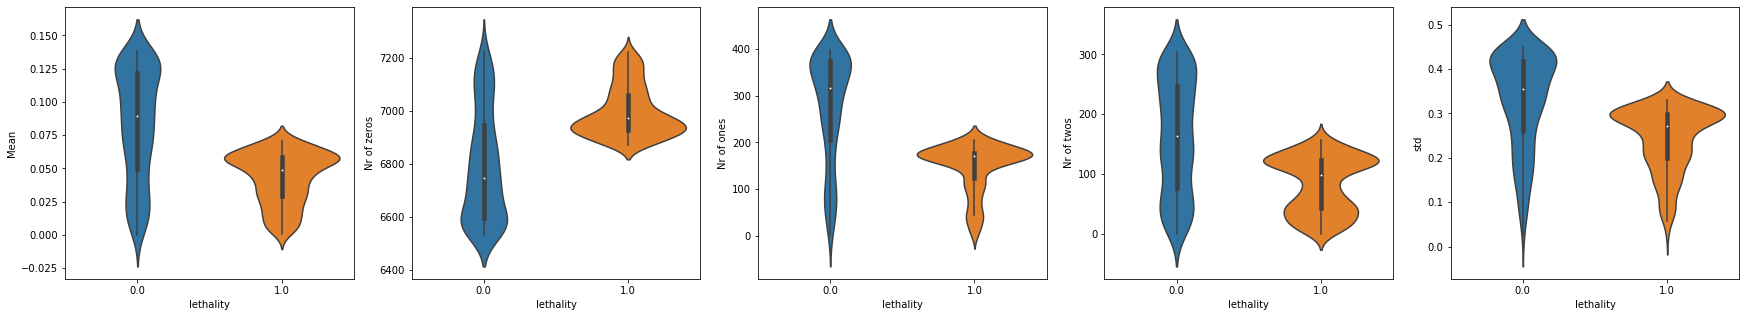

In [107]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="lethality", y="Mean", data=feature_post,ax=axs[0])
sns.violinplot(x="lethality", y="Nr of zeros", data=feature_post,ax=axs[1])
sns.violinplot(x="lethality", y="Nr of ones", data=feature_post,ax=axs[2])
sns.violinplot(x="lethality", y="Nr of twos", data=feature_post,ax=axs[3])
sns.violinplot(x="lethality", y="std", data=feature_post,ax=axs[4])
# sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
# sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
# sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
# sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [108]:
feature_post.corr().abs()[["lethality"]]

,lethality
Mean,0.516912
std,0.423441
Nr of zeros,0.536443
Nr of ones,0.577426
Nr of twos,0.466358
lethality,1.000000


In [8]:
# sns_plot=sns.heatmap(protein_feat_nonlethal_pd,vmin=0,vmax=2,cmap="inferno",center=1)

# sns_plot.set(xlabel='protein-domains-indexes',ylabel='SL-protein-pairs')
# fig = sns_plot.get_figure()
# fig.tight_layout()

#fig.savefig('heatmap-data-nonSL-proteins-domains.png',dpi=300,format='png',transparent=True) 

In [123]:
# data_all.to_excel('feature-matrix-all.xlsx')

In [2]:
############## Read the data ############################

# data_all=pd.read_excel('feature-matrix-all.xlsx')

In [109]:
X, y = feature_post.drop(columns=["lethality"]), feature_post["lethality"]


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 0)

In [111]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [112]:
from sklearn.decomposition import PCA
pca = PCA() 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

1


Text(0.5, 0, 'Principal Components')

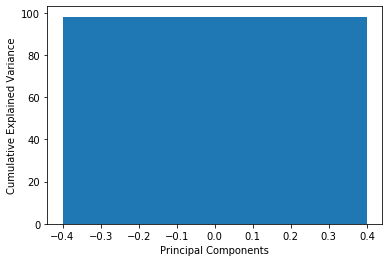

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(1), cum_sum)
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principal Components")


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
search = GridSearchCV(SVC(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [115]:
best_parameters = search.best_estimator_
print(best_parameters)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [116]:
model=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
y_pred=model.predict(X_test)

len(y_pred[y_pred==y_test]),len(y_pred)



(248, 300)

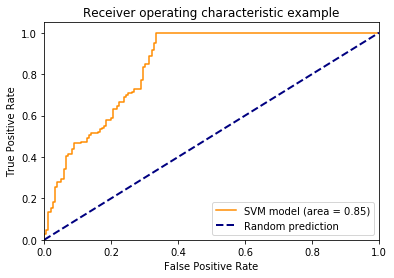

In [142]:
import sklearn.metrics as metrics
scores=model.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
area=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',label='SVM model (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='Random prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
print('Accuracy Score:',round(accuracy_score(y_test, y_pred),2))
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy Score: 0.83


Text(0.5, 257.44, 'Predicted label')

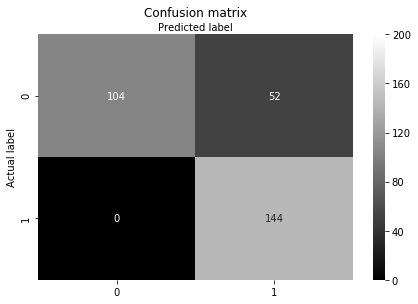

In [132]:
class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
cm = confusion_matrix(y_test, y_pred)
class_names=['SL', 'nSL']

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="gray" ,fmt='g',vmin=0,vmax=200)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Precision ($P$) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false positives($F_p$).

$P=\frac{T_p}{T_p+F_p}$

Recall ($R$) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false negatives($F_n$).

$R=\frac{T_p}{T_p+F_n}$



In [133]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7346938775510204
Recall: 1.0


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

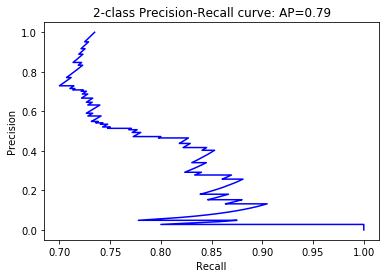

In [149]:
precision, recall, thresholds = precision_recall_curve(y_test, scores)
average_precision = metrics.average_precision_score(y_test, scores)
plt.plot(precision,recall,color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Feature importance

In [151]:
model=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train, y_train)
pd.Series(abs(model.coef_[0]), index=features.columns).nlargest(10).plot(kind='barh')

AttributeError: coef_ is only available when using a linear kernel